<a href="https://colab.research.google.com/github/iwatobipen/playground/blob/master/mishima_syk13_hanson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##GPUを使いたい場合
- ランタイム＝＞ランタイムのタイプを変更でGPUにしてください。

## 最初に環境を作ります。
- ColabのPythonのバージョンが3.6.7だったのでMinicondaも3.6を入れます。
- 次いでconda commandでrdkit  をインストールします。
　＝＞そこそこ時間かかります。
- pytorchなどGeneratorに必要なパッケージ群を入れます
- システムPathにCondaのPathを入れることでRDKITを呼び出せるようにします。
- 手元の環境で全部終わるのに１０分以上かかる感じなのでこれを使う場合は早めに実行しておきましょう。

In [1]:
# install conda
!wget https://repo.continuum.io/miniconda/Miniconda3-4.4.10-Linux-x86_64.sh
!chmod ./Miniconda3-4.4.10-Linux-x86_64.sh
!time bash ./Miniconda3-4.4.10-Linux-x86_64.sh -b -f -p /usr/local
# install rdkit via conda command
!time conda install -c conda-forge rdkit -y
# install pytorch via conda command
!time conda install -c pytorch pytorch==0.3.0 -y
# install sklearn via conda command
!time conda install -c conda-forge scikit-learn -y
!time conda install -c conda-forge pexpect  -y

--2019-01-03 04:58:55--  https://repo.continuum.io/miniconda/Miniconda3-4.4.10-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.16.19.10, 104.16.18.10, 2606:4700::6810:130a, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.16.19.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58304693 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.4.10-Linux-x86_64.sh.1’

Miniconda3-4.4.10-L 100%[===================>]  55.60M   107MB/s    in 0.5s    

2019-01-03 04:58:55 (107 MB/s) - ‘Miniconda3-4.4.10-Linux-x86_64.sh.1’ saved [58304693/58304693]

chmod: missing operand after ‘./Miniconda3-4.4.10-Linux-x86_64.sh’
Try 'chmod --help' for more information.
PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anaconda, Inc.
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-h7cc24e2_2 ...
installing: libstdcxx-ng-7.2.0-h7a57d05_2 ...
installing: lib

## パッケージインストールが終わったらコードを実行してみましょう。
- git clone でREINVENTを入手、テスト済みのデータをMishimasykのリポジトリから入手します。
- 次いでREINVENT内のDataフォルダを丸ごと入れ替えます。
- WGETやGITの部分は繰り返すと重複してフォルダが増えるので注意しましょう。!ls や!pwdで適当にチェックしてください。

In [2]:
import sys
import os
sys.path.append('/usr/local/lib/python3.6/site-packages/')
from rdkit import Chem
from rdkit import rdBase
print(rdBase.rdkitVersion)

2018.09.1


In [3]:
!git clone https://github.com/MarcusOlivecrona/REINVENT.git
os.chdir('./REINVENT')
!wget https://github.com/Mishima-syk/13/raw/master/generator_hanson/data.zip
!rm -r data/
!unzip data.zip
#Run generator!
!time ./main.py --scoring-function tanimoto --scoring-function-kwargs query_structure 'COc1ccccc1' --num-steps 10

fatal: destination path 'REINVENT' already exists and is not an empty directory.
--2019-01-03 05:06:57--  https://github.com/Mishima-syk/13/raw/master/generator_hanson/data.zip
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Mishima-syk/13/master/generator_hanson/data.zip [following]
--2019-01-03 05:06:57--  https://raw.githubusercontent.com/Mishima-syk/13/master/generator_handson/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78454973 (75M) [application/zip]
Saving to: ‘data.zip.1’

data.zip.1          100%[===================>]  74.82M   185MB/s    in 0.4s    

2019-01

In [5]:
!time ./main.py --scoring-function tanimoto --scoring-function-kwargs query_structure 'COc1ccccc1' --num-steps 10

/usr/local/lib/python3.6/site-packages/torch/nn/modules/module.py:482: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)
Model initialized, starting training...
/content/REINVENT/model.py:99: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = F.softmax(logits)
/content/REINVENT/model.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_prob = F.log_softmax(logits)
/content/REINVENT/model.py:65: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_prob = F.log_softmax(logits)
/content/REINVENT/model.py:66: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob 

## 今度は学習済みのモデルからダイレクトにサンプリングします。
- vocには学習データから作成した語彙（Smilesに使われるキャラクター）が含まれます。
- Agent objectを作成後学習済みの重みをロードします。
- ロード部分をスキップしてSamplingするとまともな構造は出ません。確認してみましょう。

In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import os
from model import RNN
from data_structs import Vocabulary, Experience
from utils import Variable, seq_to_smiles, fraction_valid_smiles, unique
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
voc = Vocabulary(init_from_file="data/Voc")

In [39]:
Agent = RNN(voc)
Agent.rnn.load_state_dict(torch.load('data/Prior.ckpt', map_location=lambda storage, loc: storage))

/usr/local/lib/python3.6/site-packages/torch/nn/modules/module.py:482: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)


In [45]:
seqs, agent_likelihood, entropy = Agent.sample(20)

/content/REINVENT/model.py:99: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = F.softmax(logits)
/content/REINVENT/model.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_prob = F.log_softmax(logits)


In [0]:
smiles = seq_to_smiles(seqs, voc)

In [47]:
validmols = []
for smi in smiles:
  mol = Chem.MolFromSmiles(smi)
  if mol != None:
    print(smi)
    validmols.append(mol)

CC1COCCN1c1nc(N2CCOCC2)nc(C2CCNC2)n1
Cc1nc(NCCCN2CCN(C)CC2)c2cnn(-c3cccc(Cl)c3)c2n1
O=C(Nc1cccc2cccnc12)c1ccc(NCc2cccc(Cl)c2)cc1
CC(C)(C)c1cc(C(=O)Nc2cc3c(c(OC(=O)N4CCOCC4)c(=O)[nH]3)c(F)cn2)c(F)cn1
COc1ccc(-n2sc(=NC(=O)c3ccc(OC)c(OC)c3)nn2)cc1
C=CCOC(=O)NCCC[N+](C)(C)CCSC
CN=C1N=C(Nc2nccs2)SC1=Nc1ccccc1
Cc1ccc(NC(S)=NNC(=S)NC(=O)C=Cc2ccccc2)cc1C
CCOC(=O)c1cc2c3ccccc3n(Cc3ccccc3)c2c[n+]1CC
COc1ccc2c(c1)NC1(CCN(Cc3nccs3)CC1)CN2
COC(=O)C1=C(c2ccc(F)cc2)S(=O)(=O)N=C1N1CCN(C(=O)c2cccc(F)c2)CC1
Cc1cn2cc(C(F)(F)F)nc2c(C#Cc2ccccn2)n1
CCN(CC)c1ccc(C=NN=C(N)NO)cc1
CCC(=O)NCCc1cc(Br)ccc1OCc1ccccc1C#N
Cc1ccc(Cl)c2c1CC(O)C(NCC1(c3ccoc3)CCC1)C2
CCn1nc2c(c1C)C(=O)C(=Cc1ccncc1)CC2
Cc1noc(NC(=O)c2ccccc2)c1NC(C)=C1C(=O)CC(c2ccccc2)CC1=O
O=C(Nc1nnc(Cc2ccc(Cl)cc2O)s1)c1ccccc1
Cc1ccccc1-c1cc2ccccc2nc1SCC(=O)NCC1CCCO1


In [48]:
len(validmols)

19

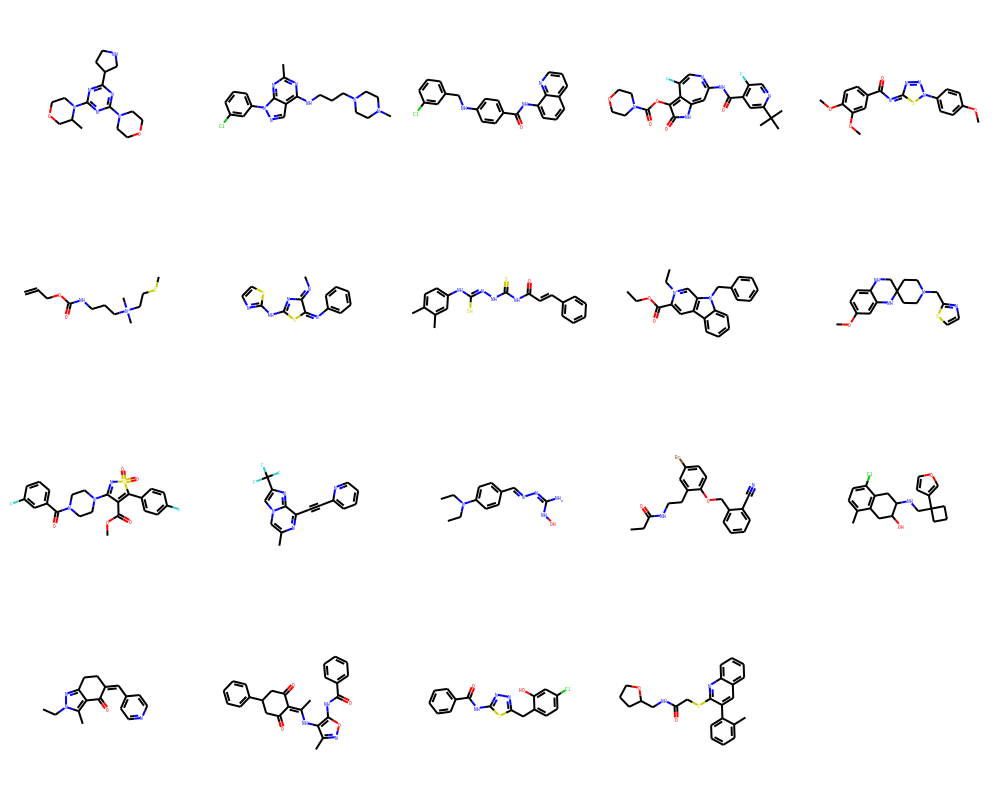

In [52]:
Draw.MolsToGridImage(validmols, molsPerRow=5)